In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('BigMart_train.csv')

In [4]:
data.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1275,FDH10,21.000,Low Fat,0.049584,Snack Foods,193.8478,OUT017,2007,NaN,Tier 2,Supermarket Type1,1162.4868
5751,DRM49,6.110,Regular,0.151828,Soft Drinks,43.0086,OUT013,1987,High,Tier 3,Supermarket Type1,490.6946
3548,FDP32,6.650,Low Fat,0.088165,Fruits and Vegetables,126.8678,OUT017,2007,NaN,Tier 2,Supermarket Type1,1780.3492
51,FDM40,10.195,Low Fat,0.159804,Frozen Foods,141.5154,OUT013,1987,High,Tier 3,Supermarket Type1,850.8924
430,FDW23,NaN,Low Fat,0.143593,Baking Goods,37.3164,OUT019,1985,Small,Tier 1,Grocery Store,38.6164


In [5]:
data.shape

(8523, 12)

In [6]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Checking for null values

In [7]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
per = data.isnull().sum()*100 / len(data)
print(per)

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64


## Checking for duplicate values

In [10]:
data.duplicated().any()

False

## Handling the missing values

In [11]:
data['Item_Weight']

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64

In [12]:
data['Outlet_Size']

0       Medium
1       Medium
2       Medium
3          NaN
4         High
         ...  
8518      High
8519       NaN
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

## Now we try Univariat Imputation

In [13]:
mean_weight = data['Item_Weight'].mean()
median_weight = data['Item_Weight'].median()

In [14]:
print(mean_weight, median_weight)

12.857645184135976 12.6


In [15]:
data['Item_Weight_mean'] = data['Item_Weight'].fillna(mean_weight)
data['Item_Weight_median'] = data['Item_Weight'].fillna(median_weight)

In [16]:
data.head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_mean,Item_Weight_median
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138,9.3,9.3


In [17]:
print("Original weight variable variance",data['Item_Weight'].var())
print("Item weight variance after mean imputation",data['Item_Weight_mean'].var())
print("Item weight variance after median imputation",data['Item_Weight_median'].var())

Original weight variable variance 21.561688259836558
Item weight variance after mean imputation 17.86012173506058
Item weight variance after median imputation 17.869561454073647


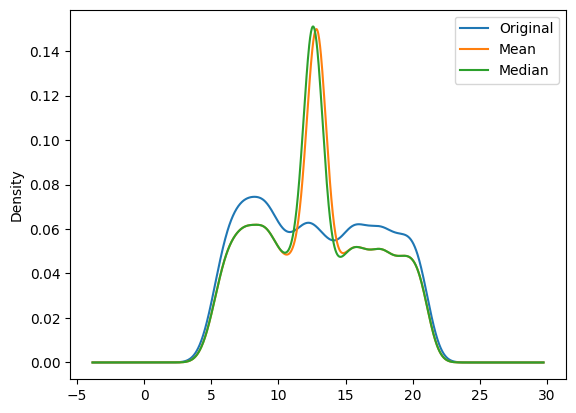

In [18]:
data['Item_Weight'].plot(kind = "kde", label="Original")
data['Item_Weight_mean'].plot(kind = "kde", label="Mean")
data['Item_Weight_median'].plot(kind = "kde", label="Median")

plt.legend()
plt.show()

<AxesSubplot:>

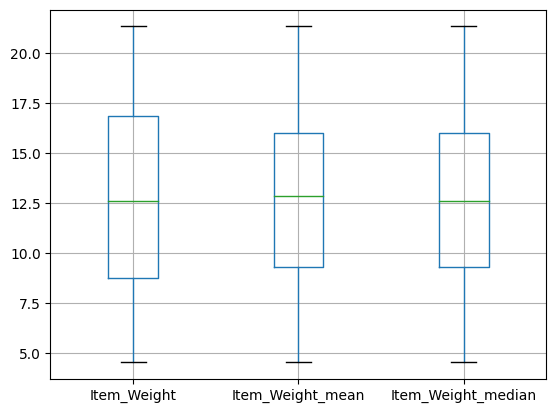

In [19]:
data[['Item_Weight','Item_Weight_mean','Item_Weight_median']].boxplot()

In [20]:
data['Item_Weight_interpolate']= data['Item_Weight'].interpolate(method="linear")

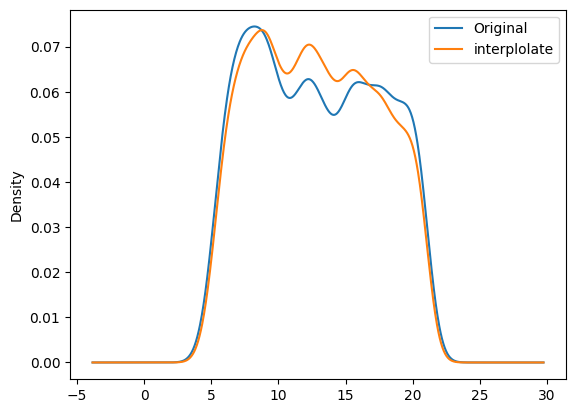

In [21]:
data['Item_Weight'].plot(kind = "kde", label="Original")
data['Item_Weight_interpolate'].plot(kind = "kde", label="interplolate")

plt.legend()
plt.show()

## Now we try Multivariate Imputation

In [22]:
from sklearn.impute import KNNImputer

In [23]:
knn = KNNImputer(n_neighbors=10, weights="distance")

In [24]:
data['knn_imputer'] = knn.fit_transform(data[['Item_Weight']]).ravel()

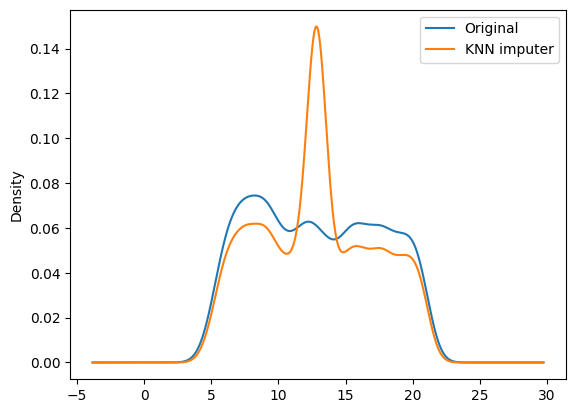

In [25]:
data['Item_Weight'].plot(kind = "kde", label="Original")
data['knn_imputer'].plot(kind = "kde", label="KNN imputer")

plt.legend()
plt.show()

In [26]:
data = data.drop(['Item_Weight','Item_Weight_mean','Item_Weight_median','knn_imputer'],axis=1)

In [27]:
data.head(1)

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interpolate
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138,9.3


In [28]:
data.isnull().sum()

Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_Weight_interpolate         0
dtype: int64

In [29]:
# Here we handle the null values of Item_Weight

## Handle the missing values of Outlet_Size

In [30]:
data['Outlet_Size'].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [31]:
data['Outlet_Type'].value_counts()

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

In [32]:
data.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x:x.mode()[0]))

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [33]:
missing_values = data['Outlet_Size'].isnull()

In [34]:
missing_values

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [35]:
mode_outlet = data.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x:x.mode()[0]))

In [36]:
mode_outlet

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [37]:
missing_values = data['Outlet_Size'].isnull()

In [38]:
missing_values

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [39]:
data.loc[missing_values,'Outlet_Size'] = data.loc[missing_values,'Outlet_Type'].apply(lambda x :mode_outlet[x])

In [40]:
data.isnull().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Item_Weight_interpolate      0
dtype: int64

## Item_Fat_Content

In [41]:
data.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'Item_Weight_interpolate'],
      dtype='object')

In [42]:
data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [43]:
data.replace({'Item_Fat_Content':{'Low Fat':'LF','low fat':'LF','reg':'Regular'}},inplace=True)

In [44]:
data['Item_Fat_Content'].value_counts()

Item_Fat_Content
LF         5517
Regular    3006
Name: count, dtype: int64

## Item_Visibility

In [45]:
data.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'Item_Weight_interpolate'],
      dtype='object')

In [46]:
data['Item_Visibility'].value_counts()

Item_Visibility
0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: count, Length: 7880, dtype: int64

In [47]:
data['Item_Visibility_Interpolate']=data['Item_Visibility'].replace(0,np.nan).interpolate(method='linear')

In [48]:
data.head(1)

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interpolate,Item_Visibility_Interpolate
0,FDA15,LF,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138,9.3,0.016047


In [49]:
data['Item_Visibility_Interpolate'].value_counts()

Item_Visibility_Interpolate
0.076975    3
0.044024    2
0.040912    2
0.076856    2
0.078759    2
           ..
0.021011    1
0.099189    1
0.076866    1
0.014116    1
0.044878    1
Name: count, Length: 8405, dtype: int64

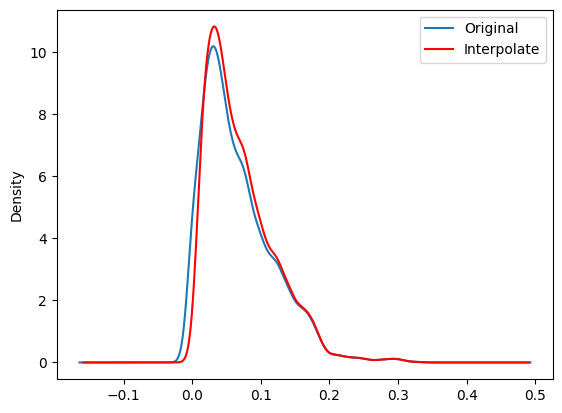

In [50]:
data['Item_Visibility'].plot(kind="kde",label="Original")

data['Item_Visibility_Interpolate'].plot(kind="kde",color='red',label="Interpolate")

plt.legend()
plt.show()

In [51]:
data = data.drop('Item_Visibility',axis=1)

In [52]:
data.head(1)

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interpolate,Item_Visibility_Interpolate
0,FDA15,LF,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138,9.3,0.016047


## Item_Type

In [53]:
data.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales',
       'Item_Weight_interpolate', 'Item_Visibility_Interpolate'],
      dtype='object')

In [54]:
data['Item_Type'].value_counts()

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

## Item_Identifier

In [55]:
data.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales',
       'Item_Weight_interpolate', 'Item_Visibility_Interpolate'],
      dtype='object')

In [56]:
data['Item_Identifier'].value_counts().sample(5)

Item_Identifier
NCK29    8
NCC55    2
FDW37    3
FDJ44    8
FDJ50    3
Name: count, dtype: int64

In [57]:
data['Item_Identifier'] = data['Item_Identifier'].apply(lambda x : x[:2])

In [58]:
data['Item_Identifier'].value_counts()

Item_Identifier
FD    6125
NC    1599
DR     799
Name: count, dtype: int64

## Outlet_Establishment_Year

In [59]:
data.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales',
       'Item_Weight_interpolate', 'Item_Visibility_Interpolate'],
      dtype='object')

In [60]:
data['Outlet_Establishment_Year']

0       1999
1       2009
2       1999
3       1998
4       1987
        ... 
8518    1987
8519    2002
8520    2004
8521    2009
8522    1997
Name: Outlet_Establishment_Year, Length: 8523, dtype: int64

In [61]:
import datetime as dt

In [62]:
current_year = dt.datetime.today().year

In [63]:
current_year

2024

In [64]:
data['Outlet_age'] = current_year - data['Outlet_Establishment_Year']

In [65]:
data.head(1)

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interpolate,Item_Visibility_Interpolate,Outlet_age
0,FD,LF,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138,9.3,0.016047,25


In [66]:
data = data.drop('Outlet_Establishment_Year',axis=1)

In [67]:
data.head(1)

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interpolate,Item_Visibility_Interpolate,Outlet_age
0,FD,LF,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.138,9.3,0.016047,25


## Handling Categorial Columns

In [68]:
from sklearn.preprocessing import OrdinalEncoder

data_encoded = data.copy()

cat_cols = data.select_dtypes(include=['object']).columns

for col in cat_cols:
    oe = OrdinalEncoder()
    data_encoded[col] = oe.fit_transform(data_encoded[[col]])
    print(oe.categories_)

[array(['DR', 'FD', 'NC'], dtype=object)]
[array(['LF', 'Regular'], dtype=object)]
[array(['Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy',
       'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks',
       'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood',
       'Snack Foods', 'Soft Drinks', 'Starchy Foods'], dtype=object)]
[array(['OUT010', 'OUT013', 'OUT017', 'OUT018', 'OUT019', 'OUT027',
       'OUT035', 'OUT045', 'OUT046', 'OUT049'], dtype=object)]
[array(['High', 'Medium', 'Small'], dtype=object)]
[array(['Tier 1', 'Tier 2', 'Tier 3'], dtype=object)]
[array(['Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3'], dtype=object)]


In [69]:
data_encoded.head(3)

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interpolate,Item_Visibility_Interpolate,Outlet_age
0,1.0,0.0,4.0,249.8092,9.0,1.0,0.0,1.0,3735.1380,9.30,0.016047,25
1,0.0,1.0,14.0,48.2692,3.0,1.0,2.0,2.0,443.4228,5.92,0.019278,15
2,1.0,0.0,10.0,141.6180,9.0,1.0,0.0,1.0,2097.2700,17.50,0.016760,25


In [70]:
x = data_encoded.drop('Item_Outlet_Sales',axis=1)
y = data_encoded['Item_Outlet_Sales']

In [71]:
x.head(3)

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight_interpolate,Item_Visibility_Interpolate,Outlet_age
0,1.0,0.0,4.0,249.8092,9.0,1.0,0.0,1.0,9.30,0.016047,25
1,0.0,1.0,14.0,48.2692,3.0,1.0,2.0,2.0,5.92,0.019278,15
2,1.0,0.0,10.0,141.6180,9.0,1.0,0.0,1.0,17.50,0.016760,25


In [72]:
y.head(3)

0    3735.1380
1     443.4228
2    2097.2700
Name: Item_Outlet_Sales, dtype: float64

## Random Forest Regressor

In [73]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100,random_state=42)
scores = cross_val_score(rf,x,y,cv=5,scoring='r2')
print(scores.mean())

0.5549992903957147


In [74]:
# XGBRFRegressor

In [75]:
from xgboost import XGBRFRegressor

xg = XGBRFRegressor(n_estimators=100,random_state=42)
scores = cross_val_score(xg,x,y,cv=5,scoring='r2')
print(scores.mean())

0.5954067732342189


## XGBRFRegressor Feature importances

In [76]:
xg = XGBRFRegressor(n_estimators=100,random_state=42)

xg1 = xg.fit(x,y)
pd.DataFrame({
    'feature':x.columns,
    'XGBRF_importance':xg1.feature_importances_
    
}).sort_values(by='XGBRF_importance',ascending=False)

,feature,XGBRF_importance
7,Outlet_Type,0.349864
5,Outlet_Size,0.192658
10,Outlet_age,0.175040
3,Item_MRP,0.131012
4,Outlet_Identifier,0.130735
6,Outlet_Location_Type,0.013184
9,Item_Visibility_Interpolate,0.002493
8,Item_Weight_interpolate,0.001770
2,Item_Type,0.001566
0,Item_Identifier,0.000999


### List of columns that we can drop 

In [77]:
['Item_Visibility_interpolate','Item_Weight_interploate',
'Item_Type','Outlet_Location_Type','Item_Identifier','Item_Fat_Content']

['Item_Visibility_interpolate',
 'Item_Weight_interploate',
 'Item_Type',
 'Outlet_Location_Type',
 'Item_Identifier',
 'Item_Fat_Content']

In [78]:
from xgboost import XGBRFRegressor

xg = XGBRFRegressor(n_estimators=100,random_state=42)
scores = cross_val_score(xg1,x.drop(['Item_Visibility_Interpolate','Item_Weight_interpolate',
'Item_Type','Outlet_Location_Type','Item_Identifier','Item_Fat_Content'],axis=1),y,cv=5,scoring='r2')
print(scores.mean())

0.5966037632320667


In [79]:
final_data = x.drop(columns=['Item_Visibility_Interpolate','Item_Weight_interpolate',
'Item_Type','Outlet_Location_Type','Item_Identifier','Item_Fat_Content'],axis=1)

In [80]:
final_data.head(5)

,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Type,Outlet_age
0,249.8092,9.0,1.0,1.0,25
1,48.2692,3.0,1.0,2.0,15
2,141.6180,9.0,1.0,1.0,25
3,182.0950,0.0,2.0,0.0,26
4,53.8614,1.0,0.0,1.0,37


## Best Model

In [81]:
from xgboost import XGBRFRegressor

In [82]:
xg_final = XGBRFRegressor()

In [83]:
xg_final.fit(final_data,y)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [85]:
X_train,X_test,y_train,y_test = train_test_split(final_data,y,
                                                 test_size=0.20,
                                                 random_state=42)

In [86]:
xg_final.fit(X_train,y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [87]:
y_pred = xg_final.predict(X_test)

In [88]:
mean_absolute_error(y_test,y_pred)

713.9516489619299

## Prediction on Unseen Data

In [89]:
pred = xg_final.predict(np.array([[141.6180,9.0,1.0,1.0,24]]))[0]
print(pred)

2067.0864


In [90]:
print(f"Sales Value is between {pred-714.42} and {pred+714.42}")

Sales Value is between 1352.66642578125 and 2781.50642578125


## Save Model Using Joblib

In [91]:
import joblib

In [92]:
joblib.dump(xg_final,'bigmart_model')

['bigmart_model']

In [93]:
model = joblib.load('bigmart_model')

In [94]:
pred = model.predict(np.array([[141.6180,9.0,1.0,1.0,24]]))[0]
print(pred)

2067.0864


In [95]:
print(f"Sales Value is between {pred-714.42} and {pred+714.42}")

Sales Value is between 1352.66642578125 and 2781.50642578125
